In [56]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt 

In [57]:
df = pd.read_csv("income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [58]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [59]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [60]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [61]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix("occupation_")], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix("workclass_")], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix("marital-status_")], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix("relationship_")], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix("race_")], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix("native-country_")], axis=1)
df = df.drop('education', axis=1)

df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

In [64]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


<Axes: >

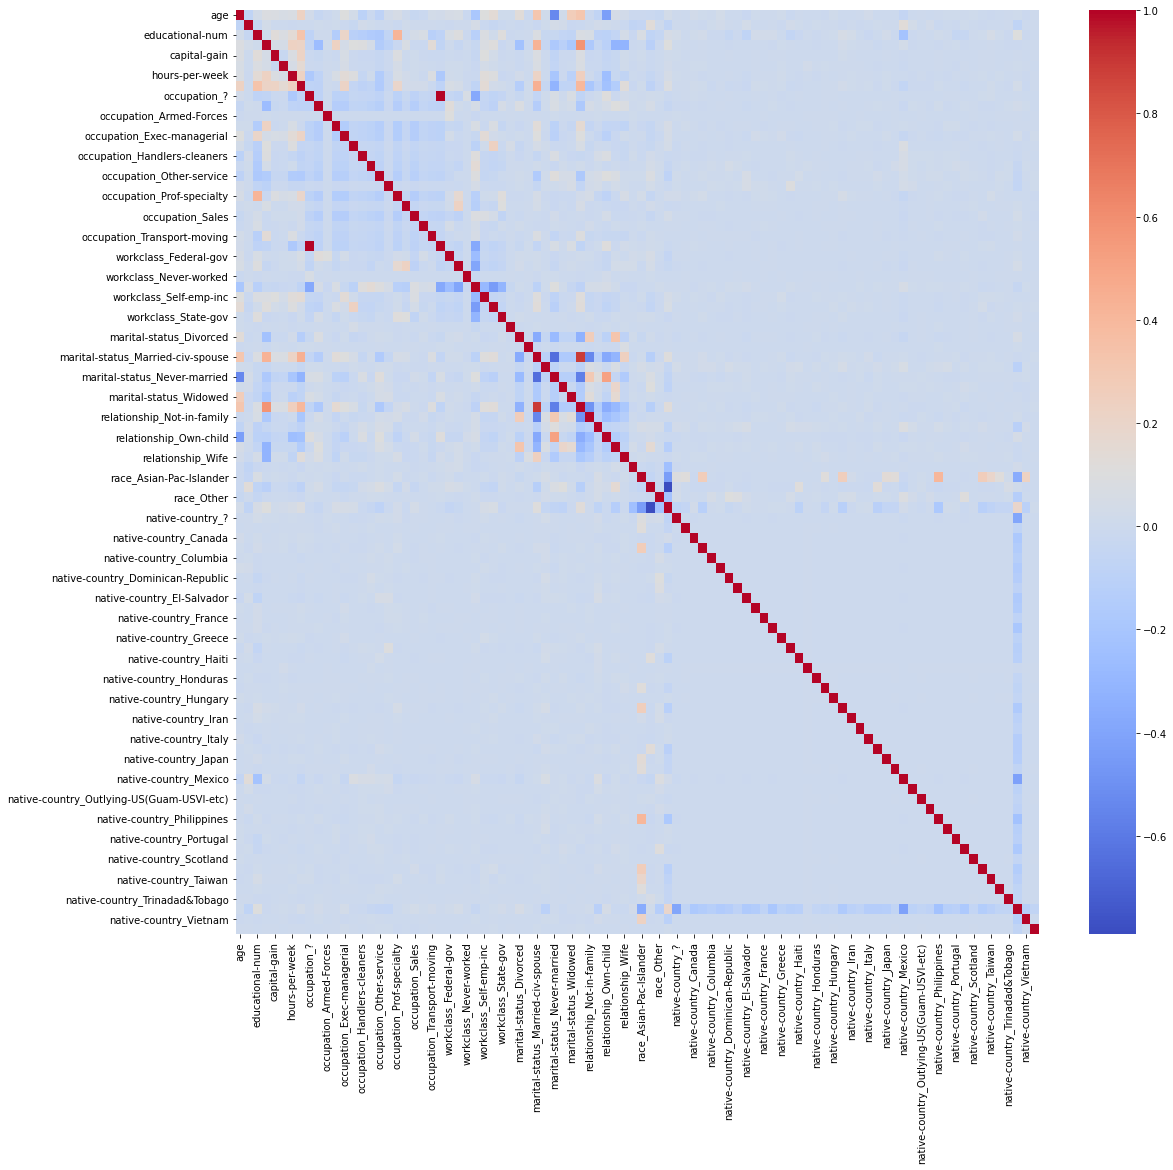

In [65]:
plt.figure(figsize=(18,17))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [66]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

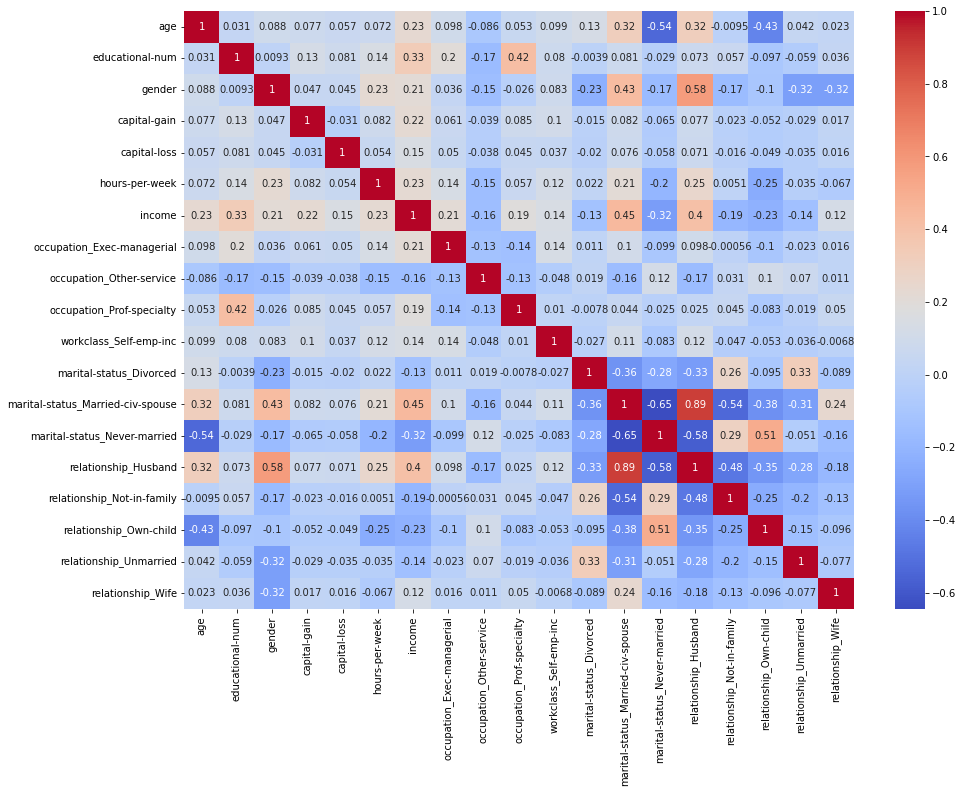

In [67]:
plt.figure(figsize=(15,11))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [68]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split

In [69]:
df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [70]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [71]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [72]:
forest.score(test_X, test_y)

0.8504452861091207

In [73]:
forest.feature_importances_

array([2.25438475e-01, 1.25696027e-01, 1.16965296e-02, 1.16782326e-01,
       3.74375220e-02, 1.12483305e-01, 1.74908443e-03, 5.09322705e-03,
       1.20333318e-04, 6.20388972e-03, 1.82719599e-02, 4.79418070e-03,
       3.31208144e-03, 3.87079177e-03, 7.48123944e-03, 2.23582237e-04,
       1.82943173e-02, 2.85092701e-03, 6.01537524e-03, 4.23784858e-03,
       4.23740932e-03, 1.57268946e-03, 5.02875159e-03, 5.35213312e-03,
       2.69905341e-08, 9.05260609e-03, 5.52781379e-03, 8.30141571e-03,
       4.33786551e-03, 1.59495632e-04, 6.36058847e-03, 3.20431609e-04,
       8.39616456e-02, 8.57003774e-04, 2.29581109e-02, 1.95405370e-03,
       1.78937285e-03, 4.87324986e-02, 1.06665351e-02, 1.62753021e-03,
       7.17816719e-03, 5.80698203e-03, 8.27648717e-03, 1.38985895e-03,
       2.85038755e-03, 4.68544444e-03, 9.55745322e-04, 6.12311558e-03,
       2.69362137e-03, 3.63160206e-04, 1.20083770e-03, 5.24056405e-04,
       3.19560239e-04, 8.02812385e-04, 2.47654663e-04, 1.77458652e-04,
      

In [74]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [75]:
importance = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importance = {k: v for k, v in sorted(importance.items(), key=lambda x: x[1], reverse=True)}
importance

{'age': 0.22543847524770508,
 'educational-num': 0.12569602698580976,
 'capital-gain': 0.11678232571912214,
 'hours-per-week': 0.11248330535431844,
 'marital-status_Married-civ-spouse': 0.08396164555111628,
 'relationship_Husband': 0.048732498565642636,
 'capital-loss': 0.037437522026978906,
 'marital-status_Never-married': 0.0229581109001019,
 'occupation_Prof-specialty': 0.01829431729304046,
 'occupation_Exec-managerial': 0.018271959945856075,
 'gender': 0.011696529599136316,
 'relationship_Not-in-family': 0.010666535104395577,
 'workclass_Private': 0.00905260608643048,
 'workclass_Self-emp-not-inc': 0.008301415705898658,
 'relationship_Wife': 0.008276487174725525,
 'occupation_Other-service': 0.007481239440874092,
 'relationship_Own-child': 0.007178167189464728,
 'marital-status_Divorced': 0.00636058847052796,
 'native-country_United-States': 0.006209006205754776,
 'occupation_Craft-repair': 0.0062038897156347405,
 'race_White': 0.006123115581998074,
 'occupation_Sales': 0.006015375

In [80]:
from sklearn.model_selection import GridSearchCV  

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,verbose=10)

In [81]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   0.5s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.824 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.5s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [82]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [83]:
forest = grid_search.best_estimator_
forest.score(test_X, test_y)

0.8619101238611936

In [84]:
importance = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importance = {k: v for k, v in sorted(importance.items(), key=lambda x: x[1], reverse=True)}
importance

{'age': 0.15071554634448878,
 'capital-gain': 0.14081172266984546,
 'educational-num': 0.1275267086141194,
 'hours-per-week': 0.09487924101353908,
 'marital-status_Married-civ-spouse': 0.08303554247963228,
 'relationship_Husband': 0.05064115977832387,
 'capital-loss': 0.04721661598222814,
 'marital-status_Never-married': 0.04028057620513744,
 'occupation_Exec-managerial': 0.02442050866490291,
 'occupation_Prof-specialty': 0.020687351263667886,
 'gender': 0.01738538768437573,
 'relationship_Not-in-family': 0.01568107531299046,
 'relationship_Wife': 0.011547787449598019,
 'relationship_Own-child': 0.010651573047134955,
 'occupation_Other-service': 0.009831263259591624,
 'marital-status_Divorced': 0.009422198231998824,
 'workclass_Private': 0.008891593561651251,
 'workclass_Self-emp-not-inc': 0.008542732003558212,
 'relationship_Unmarried': 0.008357316428502593,
 'workclass_Self-emp-inc': 0.00694393188599779,
 'native-country_United-States': 0.006319339631858949,
 'race_White': 0.00606860